## 0. 데이터 불러오기 및 정보 확인하기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
from transformers import BertTokenizer, BertModel, BertForMaskedLM
from sentence_transformers import SentenceTransformer

/Users/yunho/opt/anaconda3/envs/llm/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
ori_sum = pd.read_csv('./all_origin_updated_mapped.csv')
print(len(ori_sum))
print(len(ori_sum[ori_sum['generated_summary'] == '-']))
print(len(ori_sum[ori_sum['keyword'].isna()]))

24323
0
0


## 1. BERT Embedding

In [3]:
# 모델 불러오기

bert_tokenizer = BertTokenizer.from_pretrained("google-bert/bert-base-cased")
bert_model = BertModel.from_pretrained("google-bert/bert-base-cased")

In [4]:
# bert tokenizing 진행 후 tokenized 길이 계산
def bert_tokenized_length(text):
    return len(bert_tokenizer.tokenize(text))

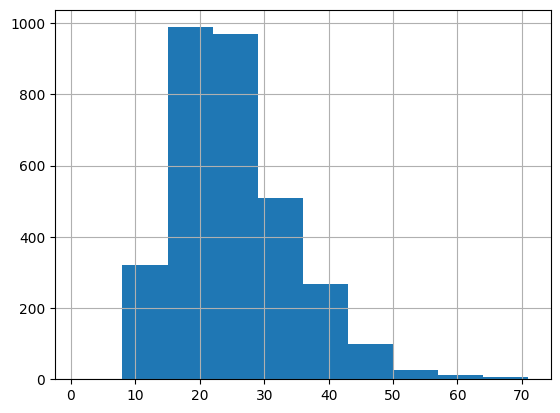

In [5]:
# bert tokenizing 진행 후 tokenized 길이 계산 > 분포 확인 후 패딩 길이 지정
ori_sum['tokenized_length'] = ori_sum['generated_summary'].apply(bert_tokenized_length)

ori_sum['tokenized_length'].hist(bins=10)
plt.show()

In [ ]:
def get_bert_embedding(text):
    tokens = bert_tokenizer(text, return_tensors="pt", truncation=True, padding="max_length", max_length=32)
    with torch.no_grad():
        outputs = bert_model(**tokens)
    return outputs.last_hidden_state.mean(dim=1).squeeze().tolist()

# 64차원 bert 임베딩
ori_sum["bert_embeddings"] = ori_sum['generated_summary'].apply(get_bert_embedding)

## 2. SBERT Embedding

In [3]:
sbert_model = SentenceTransformer("all-MiniLM-L6-v2")

def get_sbert_embedding(text):
    return list(sbert_model.encode(text))

# 384차원 sbert 임베딩
ori_sum["sbert_embeddings"] = ori_sum["generated_summary"].apply(get_sbert_embedding)

## 3. csv 파일로 저장

In [4]:
ori_sum
ori_sum.to_csv('./all_origin_emb.csv', index=False, encoding='utf-8-sig')

In [5]:
len(ori_sum)

24323